In [4]:
import matplotlib.pyplot as plt
import tensorflow as tf
from keras import Sequential, Input
from keras.layers import Dense, BatchNormalization
from tensorflow import keras

In [45]:
model = Sequential()
model.add(Input(shape=(2,)))
model.add(Dense(5, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='relu'))

# batch size, input shape
x = tf.random.normal((5, 2))

for i in range(len(model.layers)):
    print(f'Weights layer {i} zijn :\n{model.layers[i].weights}')

model(x)

Weights layer 0 zijn :
[<tf.Variable 'dense_30/kernel:0' shape=(2, 5) dtype=float32, numpy=
array([[-0.7310222 ,  0.48851264, -0.6694051 ,  0.422274  , -0.4920684 ],
       [ 0.18944168, -0.78669405,  0.2780831 ,  0.6709862 , -0.88338864]],
      dtype=float32)>, <tf.Variable 'dense_30/bias:0' shape=(5,) dtype=float32, numpy=array([0., 0., 0., 0., 0.], dtype=float32)>]
Weights layer 1 zijn :
[<tf.Variable 'dense_31/kernel:0' shape=(5, 10) dtype=float32, numpy=
array([[ 0.5066379 , -0.486246  , -0.6242802 ,  0.5310969 , -0.1387907 ,
        -0.5568032 , -0.11616087, -0.36589515,  0.49990565, -0.24617204],
       [ 0.21013433, -0.22411129,  0.1812517 , -0.23614907, -0.34146082,
         0.20789874, -0.33307755, -0.55020595, -0.25293794,  0.31394768],
       [-0.6111718 , -0.14092135,  0.4878307 , -0.14517933, -0.56270397,
         0.50444025, -0.26139963,  0.4400403 ,  0.07546997,  0.5839022 ],
       [-0.19793338,  0.09190643, -0.22242275,  0.24753636, -0.4768873 ,
         0.00413889, 

<tf.Tensor: shape=(5, 1), dtype=float32, numpy=
array([[0.        ],
       [0.02124596],
       [0.02737865],
       [0.        ],
       [0.10064537]], dtype=float32)>

In [80]:
model = Sequential()
# model.add(Input(shape=(2,)))
# model.add(Dense(4, activation='relu'))
# model.add(Dense(1))

# (3 batch size, 2 is input dimension)
x = tf.random.normal((1, 2))

print(x)

for i in range(len(model.layers)):
    print(f'Weights layer {i} zijn :\n{model.layers[i].weights}')

print(f'Output =\n {model(x)}')

tf.Tensor([[-0.55282617  0.27551627]], shape=(1, 2), dtype=float32)
Output =
 [[-0.55282617  0.27551627]]


In [46]:
# maak een "klassiek" Sequential model
model = Sequential()
model.add(Input(shape=(2,)))
model.add(BatchNormalization())
model.add(Dense(512, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))

In [48]:
# compile model
model.compile(
    loss=keras.losses.mean_squared_error,
    optimizer=keras.optimizers.Adam(),
    metrics=keras.metrics.mean_absolute_percentage_error
)

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_3 (Batc  (None, 2)                8         
 hNormalization)                                                 
                                                                 
 dense_33 (Dense)            (None, 512)               1536      
                                                                 
 dense_34 (Dense)            (None, 128)               65664     
                                                                 
 dense_35 (Dense)            (None, 64)                8256      
                                                                 
 dense_36 (Dense)            (None, 32)                2080      
                                                                 
 dense_37 (Dense)            (None, 1)                 33        
                                                     

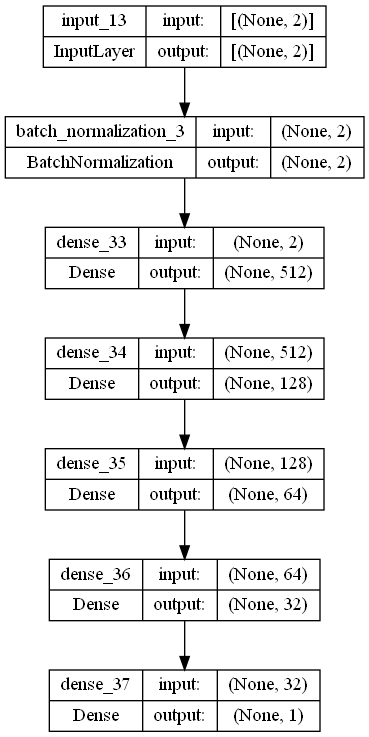

In [49]:
# summary
model.summary()
keras.utils.plot_model(model, to_file='opbouw.png', show_shapes=True)

In [50]:
import pandas as pd

data = pd.read_csv('../oefeningen/datasets/forcastdemo.csv')
data

index  quarter  revenue
0       1        1       20
1       2        2      100
2       3        3      175
3       4        4       13
4       5        1       37
5       6        2      136
6       7        3      245
7       8        4       26
8       9        1       75
9      10        2      155
10     11        3      326
11     12        4       48
12     13        1       92
13     14        2      202
14     15        3      384
15     16        4       82
16     17        1      176
17     18        2      282
18     19        3      445
19     20        4      181

In [22]:

X_train = data[['index', 'quarter']]
y_train = data.revenue

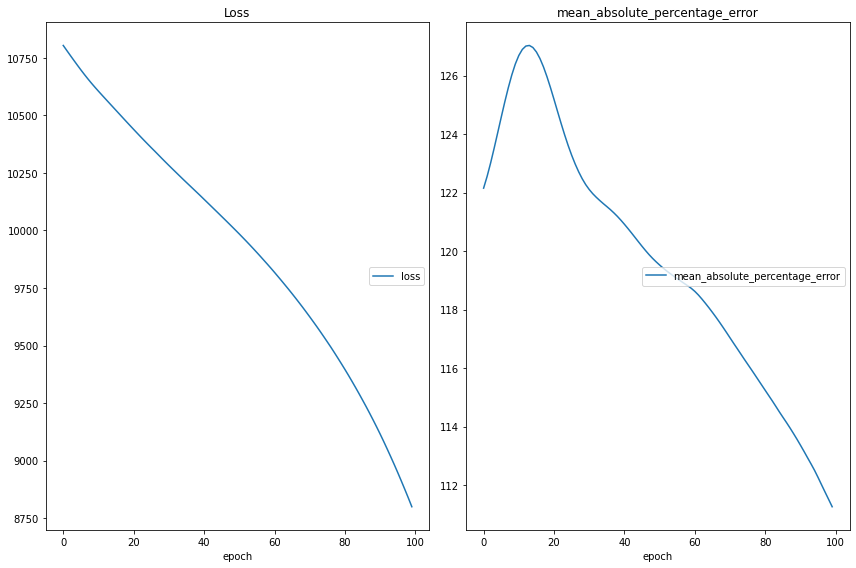

Loss
	loss             	 (min: 8799.016, max: 10804.452, cur: 8799.016)
mean_absolute_percentage_error
	mean_absolute_percentage_error 	 (min:  111.260, max:  127.031, cur:  111.260)


In [52]:
from livelossplot import PlotLossesKeras

history = model.fit(X_train, y_train,
                    batch_size=20,
                    epochs=100,
                    verbose=0,
                    callbacks=[PlotLossesKeras()])

In [137]:
model.evaluate(X_train, y_train)

1/1 [==============================] - 0s 110ms/step - loss: 343.2297 - mean_absolute_percentage_error: 18.1524


[343.229736328125, 18.152359008789062]

1/1 [==============================] - 0s 66ms/step


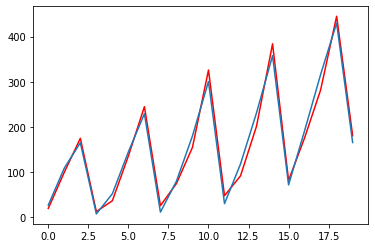

In [138]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(data.index, data.revenue, color='red')
ax.plot(data.index, model.predict(X_train))

In [66]:
from keras import Model

input = Input(shape=(2,))
x = BatchNormalization()(input)
x = Dense(10, activation=keras.activations.relu)(x)
x = Dense(4, activation='relu')(x)
# x = Dense(64, activation='relu')(x)
# x = Dense(32, activation='relu')(x)
output = Dense(1)(x)

model = Model(input, output)

In [67]:
model.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_17 (InputLayer)       [(None, 2)]               0         
                                                                 
 batch_normalization_7 (Batc  (None, 2)                8         
 hNormalization)                                                 
                                                                 
 dense_53 (Dense)            (None, 10)                30        
                                                                 
 dense_54 (Dense)            (None, 4)                 44        
                                                                 
 dense_55 (Dense)            (None, 1)                 5         
                                                                 
Total params: 87
Trainable params: 83
Non-trainable params: 4
_______________________________________________________________

In [74]:
model.compile(
    loss=keras.losses.mean_squared_error,
    optimizer=keras.optimizers.RMSprop(), # Adam, RMSprop, NAdam
    metrics=keras.metrics.mean_absolute_percentage_error
)

In [75]:
from keras.callbacks import EarlyStopping
from livelossplot import PlotLossesKeras

model.fit(X_train, y_train,
          validation_split=0.2,
          batch_size=20,
          epochs=200,
          callbacks=[PlotLossesKeras()], verbose=0)

KeyboardInterrupt: 

1/1 [==============================] - 0s 81ms/step


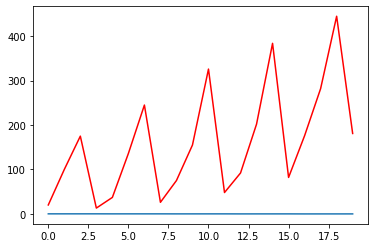

In [61]:
fig, ax = plt.subplots()
ax.plot(data.index, data.revenue, color='red')
ax.plot(data.index, model.predict(X_train))